<a href="https://colab.research.google.com/github/YounSooKimTech/Bamboo_Project/blob/main/Directors_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CEO Ethnicity Information Dataset

In [120]:
import pandas as pd

df_ceo_info = pd.read_stata('/content/directors_1996_2016_gvkey.dta')

df_ceo_info

<ipython-input-120-aa2c1d508c1d>:3: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_ceo_info = pd.read_stata('/content/directors_1996_2016_gvkey.dta')


,year,first,last,dirid,cusip,employer,legacy_pps_id,rt_id,legacy_director_id,ticker,...,company_id,cg_membership,financial_expert,non_ceo_leader,coname,donor,dupl,last5,gvkey,cusip6
0,1999.0,james,preston,1.0,755267,avon products,1754.0,4666.0,30064.0,RDA,...,NaN,,,,reader's digest association [cl a] [non vtg],james e preston,8,,185784,755267
1,2003.0,james,preston,1.0,755267,avon products,1754.0,4666.0,30064.0,RDA,...,NaN,,,,reader's digest association -cl a,james e preston,8,,185784,755267
2,1997.0,james,preston,1.0,054303,avon products,137.0,3922.0,30064.0,AVP,...,NaN,,,,avon products,james e preston,2,,1920,054303
3,1997.0,james,preston,1.0,344849,avon products,1517.0,4576.0,30064.0,Z,...,NaN,,,,woolworth,james e preston,8,,11584,344849
4,2001.0,james,preston,1.0,755267,avon products,1754.0,4666.0,30064.0,RDA,...,NaN,,,,reader's digest association -cl a,james e preston,8,,185784,755267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294687,2016.0,kristen,ohara,274771.0,451055107,time warner,NaN,NaN,NaN,ICON,...,23931.0,,,,"iconix brand group, inc.",kristen ohara,0,,20204,451055
294688,2016.0,kenneth,slutsky,274775.0,451055107,saybrook capital,NaN,NaN,NaN,ICON,...,23931.0,,,,"iconix brand group, inc.",kenneth slutsky,0,,20204,451055
294689,2016.0,linda,yaccarino,276441.0,04351G101,nbcuniversal,NaN,NaN,NaN,ASNA,...,44304.0,,,,"ascena retail group, inc.",linda yaccarino,0,,4072,04351G
294690,2016.0,gerald,chizever,277023.0,671044105,loeb loeb,NaN,NaN,NaN,OSIS,...,515189.0,,,,"osi systems, inc.",gerald chizever,0,,65607,671044


In [130]:
df_ceo_info_clean = df_ceo_info[["dirid", "first", "last", "fullname", "female", "ethnicity"]].drop_duplicates(subset=["dirid"])

df_ceo_info_clean

,dirid,first,last,fullname,female,ethnicity
0,1.0,james,preston,JAMES E PRESTON,0.0,C
27,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN
48,3.0,philip,neal,PHILIP M NEAL,0.0,C
66,4.0,peter,mullin,PETER W MULLIN,NaN,U
83,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN
...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN
294689,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN
294690,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN


In [132]:
_# Get the counts of each name in the 'fullname' column
name_counts = df_ceo_info_clean["fullname"].value_counts()

# Filter to show only those names with a count greater than 1
duplicates = name_counts[name_counts > 1]

duplicates

,count
fullname,
WILLIAM S LEE,4
SAM GINN,4
ROBERT E ALLEN,3
HARRY E RICH,3
ROBERT S FALCONE,3
...,...
GAIL DEEGAN,2
DANIEL E GOLD,2
R DAVID YOST,2


In [133]:
df_ceo_info_clean = df_ceo_info_clean.drop_duplicates(subset='fullname')

_# Get the counts of each name in the 'fullname' column
name_counts = df_ceo_info_clean["fullname"].value_counts()

# Filter to show only those names with a count greater than 1
duplicates = name_counts[name_counts > 1]

duplicates

,count
fullname,


In [134]:
df_ceo_info_clean["ethnicity"].value_counts()

,count
ethnicity,
U,13700
CAUCASIAN,11461
C,4561
UNKNOWN,3018
Unknown,1411
Caucasian,797
ASIAN,470
B,312
BLACK/AFRICAN AMERICAN,302


In [149]:
# Define a mapping dictionary for recoding
recode_map = {
    # White
    "CAUCASIAN": "White",
    "Caucasian": "White",
    "ACADEMIC": "White",
    "C":"White",

    # Black
    "BLACK/AFRICAN AMERICAN": "Black",
    "AFRICAN-AMERICAN": "Black",
    "African-American": "Black",
    "B": "Black",

    # Asian
    "ASIAN": "Asian",
    "Asian": "Asian",

    # Hispanic
    "HISPANIC/LATIN AMERICAN": "Hispanic",
    "HISPANIC": "Hispanic",
    "Hispanic": "Hispanic",
    "H":"Hispanic",

    # Indian
    "INDIAN": "Indian",

    # Middle Eastern
    "MIDDLE-EASTERN": "MiddleEastern",

    # Unknown
    "UNKNOWN": "Unknown",
    "Unknown": "Unknown",
    "unknown": "Unknown",
    "U":"Unknown",
    "NULL": "Unknown",
    "NOT AVAILABLE (SRI TEAM USE ONLY)": "Unknown",

    # Native American
    "Native American/": "Others",
    "NATIVE AMERICAN/ALASKAN NATIVE": "Others",

    # Others
    "SIR": "Others",
    "LORD": "Others"
}

# Apply the recode map to the column
df_ceo_info_clean["ethnicity_recode"] = df_ceo_info_clean["ethnicity"].map(recode_map).fillna("Others")

# Verify the recoded column
df_ceo_info_clean["ethnicity_recode"].value_counts()


<ipython-input-149-200a9da3f5a6>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ceo_info_clean["ethnicity_recode"] = df_ceo_info_clean["ethnicity"].map(recode_map).fillna("Others")


,count
ethnicity_recode,
Unknown,18219
White,16828
Black,807
Asian,495
Hispanic,334
Indian,63
MiddleEastern,31
Others,16


In [150]:
df_ceo_info_clean

,dirid,first,last,fullname,female,ethnicity,ethnicity_recode
0,1.0,james,preston,JAMES E PRESTON,0.0,C,White
27,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN,Unknown
48,3.0,philip,neal,PHILIP M NEAL,0.0,C,White
66,4.0,peter,mullin,PETER W MULLIN,NaN,U,Unknown
83,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN,White
...,...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN,White
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN,White
294689,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN,White
294690,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN,White


In [151]:
df_ceo_info_clean.pivot_table(
    index="ethnicity",
    columns="ethnicity_recode",
    aggfunc='size',
    fill_value=0
)


ethnicity_recode,Asian,Black,Hispanic,Indian,MiddleEastern,Others,Unknown,White
ethnicity,,,,,,,,
,0,0,0,0,0,8,0,0
ACADEMIC,0,0,0,0,0,0,0,9
AFRICAN-AMERICAN,0,147,0,0,0,0,0,0
ASIAN,470,0,0,0,0,0,0,0
African-American,0,46,0,0,0,0,0,0
Asian,25,0,0,0,0,0,0,0
B,0,312,0,0,0,0,0,0
BLACK/AFRICAN AMERICAN,0,302,0,0,0,0,0,0
C,0,0,0,0,0,0,0,4561


In [182]:
df_ceo_info_clean["ethnicity_recode"].value_counts()

,count
ethnicity_recode,
Unknown,18219
White,16828
Black,807
Asian,495
Hispanic,334
Indian,63
MiddleEastern,31
Others,16


In [186]:
df_ceo_info_clean["fullname"].value_counts()

,count
fullname,
JAMES E PRESTON,1
THADEUS J MOCARSKI,1
MARTIN D KRALL,1
HOWARD STRINGER,1
JOHN ZUCCOTTI,1
...,...
PAUL S. PRESSLER,1
GARY F GOODE,1
JAMES A LOCKE III,1


In [188]:
df_ceo_info_clean["dirid"].value_counts()

,count
dirid,
1.0,1
58436.0,1
58427.0,1
58428.0,1
58429.0,1
...,...
27058.0,1
27055.0,1
27048.0,1


In [191]:
df_ceo_info_clean["ethnicity_recode"].value_counts(normalize=True).round(3)

,proportion
ethnicity_recode,
Unknown,0.495
White,0.457
Black,0.022
Asian,0.013
Hispanic,0.009
Indian,0.002
MiddleEastern,0.001
Others,0.000


<ipython-input-194-6c28f768eb7b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette=colors)


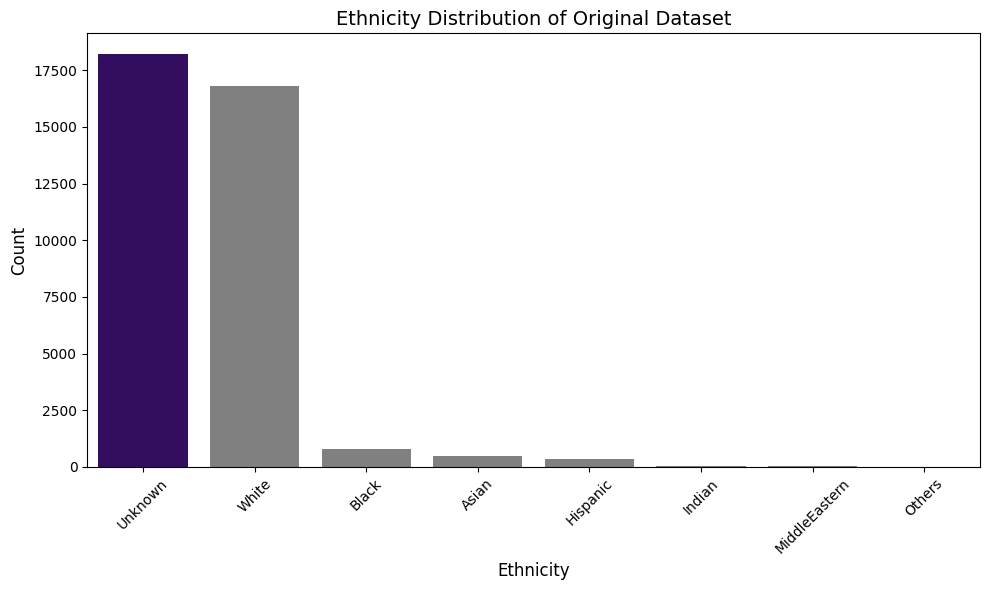

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the values in 'ethnicity_recode'
ethnicity_counts = df_ceo_info_clean["ethnicity_recode"].value_counts()

# Husky Purple
colors = ['#32006e' if val == 'Unknown' else 'grey' for val in ethnicity_counts.index]

# Create a countplot using the value counts
plt.figure(figsize=(10, 6))
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette=colors)

# Add labels and title
plt.xlabel("Ethnicity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Ethnicity Distribution of Original Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Predcit Ethnicity Based on Names

In [157]:
! git clone https://github.com/name-ethnicity-classifier/name-ethnicity-classifier
! cd name-ethnicity-classifier/

Cloning into 'name-ethnicity-classifier'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 163 (delta 45), reused 71 (delta 26), pack-reused 58 (from 1)
Receiving objects: 100% (163/163), 25.56 MiB | 24.10 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [162]:
import pandas as pd

df_names = df_ceo_info_clean[["dirid", "first", "last", "fullname"]].rename(columns={"fullname": "names"})

df_names.to_csv("names_1.csv", index=False)

df_names

,dirid,first,last,names
0,1.0,james,preston,JAMES E PRESTON
27,2.0,charles,miller,CHARLES D MILLER
48,3.0,philip,neal,PHILIP M NEAL
66,4.0,peter,mullin,PETER W MULLIN
83,5.0,richard,ferry,RICHARD M FERRY
...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY
294689,276441.0,linda,yaccarino,LINDA YACCARINO
294690,277023.0,gerald,chizever,GERALD CHIZEVER


In [164]:
! cd name-ethnicity-classifier/ && python predict_ethnicity.py -i '/content/names_1.csv' -o '/content/names_1_predictedd.csv' -m 8_groups -b 128


/content/name-ethnicity-classifier/predict_ethnicity.py:256: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location={"cuda:0

In [165]:
import pandas as pd

df_predicted = pd.read_csv('/content/names_1_predictedd.csv')

df_predicted

,names,predictions,confidences
0,JAMES E PRESTON,Celtic,92.858
1,CHARLES D MILLER,Celtic,62.297
2,PHILIP M NEAL,Celtic,91.714
3,PETER W MULLIN,Celtic,81.520
4,RICHARD M FERRY,Celtic,76.842
...,...,...,...
36788,KRISTEN O'HARA,African,76.683
36789,KENNETH SLUTSKY,Nordic,83.006
36790,LINDA YACCARINO,Celtic,65.279
36791,GERALD CHIZEVER,African,88.068


In [167]:
df_predicted["predictions"].value_counts()

,count
predictions,
Celtic,20873
African,4256
European,4251
Hispanic,3348
Nordic,2004
EastAsian,981
SouthAsian,625
Muslim,455


In [168]:
# Define a mapping dictionary for the predictions
predictions_map = {
    "Celtic": "White",
    "African": "Black",
    "European": "White",
    "Hispanic": "Hispanic",
    "Nordic": "White",
    "EastAsian": "Asian",
    "SouthAsian": "Indian",
    "Muslim": "MiddleEastern"
}

# Apply the mapping to the predictions column
df_predicted["predictions_recode"] = df_predicted["predictions"].map(predictions_map).fillna("Unknown")

df_predicted

,names,predictions,confidences,predictions_recode
0,JAMES E PRESTON,Celtic,92.858,White
1,CHARLES D MILLER,Celtic,62.297,White
2,PHILIP M NEAL,Celtic,91.714,White
3,PETER W MULLIN,Celtic,81.520,White
4,RICHARD M FERRY,Celtic,76.842,White
...,...,...,...,...
36788,KRISTEN O'HARA,African,76.683,Black
36789,KENNETH SLUTSKY,Nordic,83.006,White
36790,LINDA YACCARINO,Celtic,65.279,White
36791,GERALD CHIZEVER,African,88.068,Black


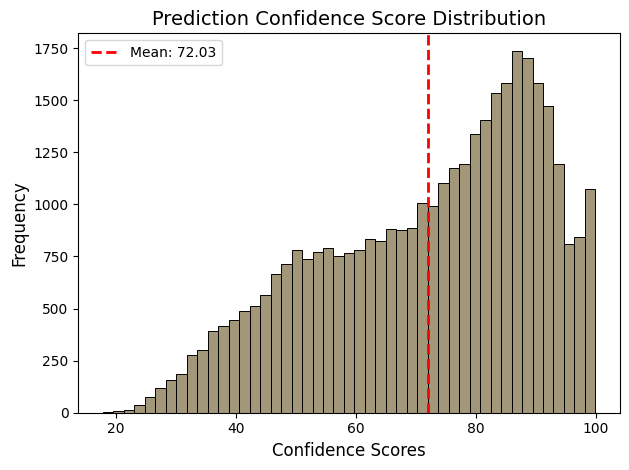

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of the 'confidences' column
mean_confidence = df_predicted["confidences"].mean()

# Plot the histogram
sns.histplot(data=df_predicted["confidences"], color="#85754d")

# Add a vertical line at the mean
plt.axvline(mean_confidence, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_confidence:.2f}")

# Add labels, title, and legend
plt.title("Prediction Confidence Score Distribution", fontsize=14)
plt.xlabel("Confidence Scores", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [211]:
df_predicted["confidences"].describe()

,confidences
count,36793.000000
mean,72.029183
std,18.340448
min,17.850000
25%,58.015000
50%,75.858000
75%,87.216000
max,99.948000


In [213]:
round(72.029183 + 18.340448, 2)

90.37

In [170]:
df_predicted.pivot_table(
    index="predictions",
    columns="predictions_recode",
    aggfunc='size',
    fill_value=0
)

predictions_recode,Asian,Black,Hispanic,Indian,MiddleEastern,White
predictions,,,,,,
African,0,4256,0,0,0,0
Celtic,0,0,0,0,0,20873
EastAsian,981,0,0,0,0,0
European,0,0,0,0,0,4251
Hispanic,0,0,3348,0,0,0
Muslim,0,0,0,0,455,0
Nordic,0,0,0,0,0,2004
SouthAsian,0,0,0,625,0,0


In [205]:
df_predicted

,names,predictions,confidences,predictions_recode
0,JAMES E PRESTON,Celtic,92.858,White
1,CHARLES D MILLER,Celtic,62.297,White
2,PHILIP M NEAL,Celtic,91.714,White
3,PETER W MULLIN,Celtic,81.520,White
4,RICHARD M FERRY,Celtic,76.842,White
...,...,...,...,...
36788,KRISTEN O'HARA,African,76.683,Black
36789,KENNETH SLUTSKY,Nordic,83.006,White
36790,LINDA YACCARINO,Celtic,65.279,White
36791,GERALD CHIZEVER,African,88.068,Black


In [228]:
# Apply the condition to update 'predictions_recode'
df_predicted["predictions_recode_strict"] = df_predicted.apply(
    lambda row: row["predictions_recode"] if row["confidences"] > 72 else "Unknown", axis=1
)


df_predicted

,names,predictions,confidences,predictions_recode,predictions_recode_strict
0,JAMES E PRESTON,Celtic,92.858,White,White
1,CHARLES D MILLER,Celtic,62.297,White,Unknown
2,PHILIP M NEAL,Celtic,91.714,White,White
3,PETER W MULLIN,Celtic,81.520,White,White
4,RICHARD M FERRY,Celtic,76.842,White,White
...,...,...,...,...,...
36788,KRISTEN O'HARA,African,76.683,Black,Black
36789,KENNETH SLUTSKY,Nordic,83.006,White,White
36790,LINDA YACCARINO,Celtic,65.279,White,Unknown
36791,GERALD CHIZEVER,African,88.068,Black,Black


In [229]:
df_predicted.pivot_table(
    index="predictions_recode",
    columns="predictions_recode_strict",
    aggfunc='size',
    fill_value=0
)

predictions_recode_strict,Asian,Black,Hispanic,Indian,MiddleEastern,Unknown,White
predictions_recode,,,,,,,
Asian,512,0,0,0,0,469,0
Black,0,1491,0,0,0,2765,0
Hispanic,0,0,2422,0,0,926,0
Indian,0,0,0,287,0,338,0
MiddleEastern,0,0,0,0,203,252,0
White,0,0,0,0,0,11312,15816


# Merge Predicted and Original

In [230]:
df_ceo_info_clean

,dirid,first,last,fullname,female,ethnicity,ethnicity_recode
0,1.0,james,preston,JAMES E PRESTON,0.0,C,White
27,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN,Unknown
48,3.0,philip,neal,PHILIP M NEAL,0.0,C,White
66,4.0,peter,mullin,PETER W MULLIN,NaN,U,Unknown
83,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN,White
...,...,...,...,...,...,...,...
294687,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN,White
294688,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN,White
294689,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN,White
294690,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN,White


In [231]:
df_predicted

,names,predictions,confidences,predictions_recode,predictions_recode_strict
0,JAMES E PRESTON,Celtic,92.858,White,White
1,CHARLES D MILLER,Celtic,62.297,White,Unknown
2,PHILIP M NEAL,Celtic,91.714,White,White
3,PETER W MULLIN,Celtic,81.520,White,White
4,RICHARD M FERRY,Celtic,76.842,White,White
...,...,...,...,...,...
36788,KRISTEN O'HARA,African,76.683,Black,Black
36789,KENNETH SLUTSKY,Nordic,83.006,White,White
36790,LINDA YACCARINO,Celtic,65.279,White,Unknown
36791,GERALD CHIZEVER,African,88.068,Black,Black


In [232]:
df_ceo_merged = pd.merge(df_ceo_info_clean, df_predicted, left_on = "fullname", right_on="names", how="left")
df_ceo_merged

,dirid,first,last,fullname,female,ethnicity,ethnicity_recode,names,predictions,confidences,predictions_recode,predictions_recode_strict
0,1.0,james,preston,JAMES E PRESTON,0.0,C,White,JAMES E PRESTON,Celtic,92.858,White,White
1,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN,Unknown,CHARLES D MILLER,Celtic,62.297,White,Unknown
2,3.0,philip,neal,PHILIP M NEAL,0.0,C,White,PHILIP M NEAL,Celtic,91.714,White,White
3,4.0,peter,mullin,PETER W MULLIN,NaN,U,Unknown,PETER W MULLIN,Celtic,81.520,White,White
4,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN,White,RICHARD M FERRY,Celtic,76.842,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...
36788,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN,White,KRISTEN O'HARA,African,76.683,Black,Black
36789,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN,White,KENNETH SLUTSKY,Nordic,83.006,White,White
36790,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN,White,LINDA YACCARINO,Celtic,65.279,White,Unknown
36791,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN,White,GERALD CHIZEVER,African,88.068,Black,Black


In [249]:
df_ceo_merged.pivot_table(
    index="ethnicity_recode",
    columns="predictions_recode",
    aggfunc='size',
    fill_value=0
)

predictions_recode,Asian,Black,Hispanic,Indian,MiddleEastern,White
ethnicity_recode,,,,,,
Asian,248,35,13,105,52,42
Black,118,91,71,29,15,483
Hispanic,3,8,285,3,4,31
Indian,0,2,0,54,5,2
MiddleEastern,0,4,1,2,18,6
Others,2,1,2,2,4,5
Unknown,408,2185,1671,258,196,13500
White,201,1930,1305,172,161,13059


<ipython-input-262-b73bd4c01926>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Set1', len(unknown_distribution))


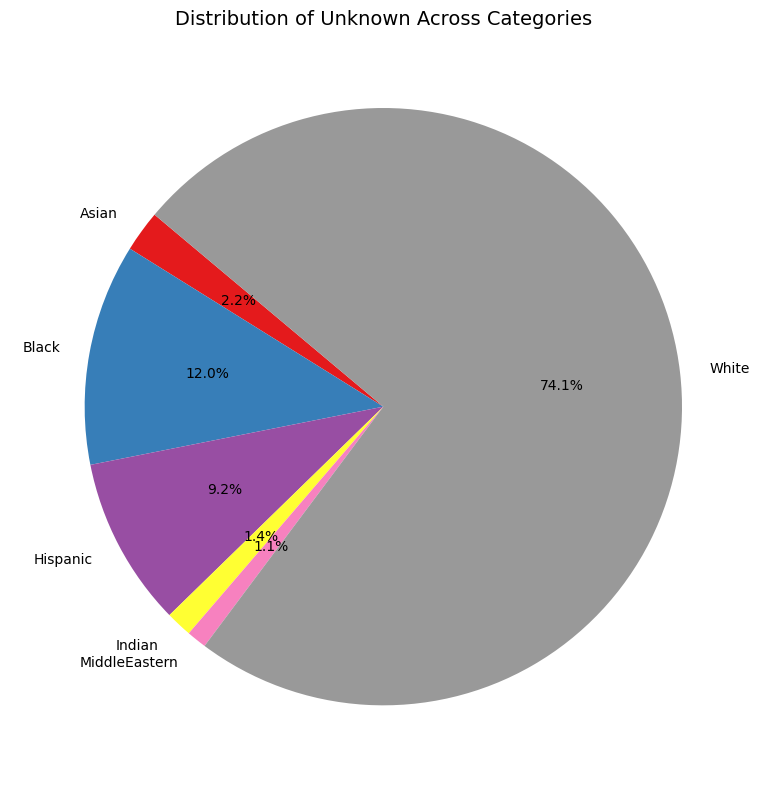

In [262]:
import matplotlib.pyplot as plt
from matplotlib import cm


matrix = df_ceo_merged.pivot_table(
    index="ethnicity_recode",
    columns="predictions_recode",
    aggfunc='size',
    fill_value=0
)

# Extract the row corresponding to 'Unknown'
unknown_distribution = matrix.loc["Unknown"]

# Create the pie chart

colors = cm.get_cmap('Set1', len(unknown_distribution))

plt.figure(figsize=(8, 8))
plt.pie(
    unknown_distribution,
    labels=unknown_distribution.index,
    autopct="%1.1f%%",
    startangle=140, colors=colors(range(len(unknown_distribution)))
)

# Add title
plt.title("Distribution of Unknown Across Categories", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## Heatmap for Accuracy

In [240]:
# Filter out rows where 'ethnicity_recode' is either "Others" or "Unknown"
df_temp = df_ceo_merged[~df_ceo_merged["ethnicity_recode"].isin(["Others", "Unknown"])]


df_temp.pivot_table(
    index="ethnicity_recode",
    columns="predictions_recode",
    aggfunc='size',
    fill_value=0
)

predictions_recode,Asian,Black,Hispanic,Indian,MiddleEastern,White
ethnicity_recode,,,,,,
Asian,248,35,13,105,52,42
Black,118,91,71,29,15,483
Hispanic,3,8,285,3,4,31
Indian,0,2,0,54,5,2
MiddleEastern,0,4,1,2,18,6
White,201,1930,1305,172,161,13059


In [241]:
correct_predictions = df_temp[df_temp['ethnicity_recode'] == df_temp['predictions_recode']]
correct_predictions_strict = df_temp[df_temp['ethnicity_recode'] == df_temp['predictions_recode_strict']]


# Count the total correct classifications
total_correct = correct_predictions.shape[0]

# Calculate accuracy
accuracy = (total_correct / df_temp.shape[0]) * 100

# Display summary
summary = {
    "Total Records": df_temp.shape[0],
    "Correctly Classified": total_correct,
    "Accuracy (%)": accuracy
}

summary

{'Total Records': 18558,
 'Correctly Classified': 13755,
 'Accuracy (%)': 74.118978338183}

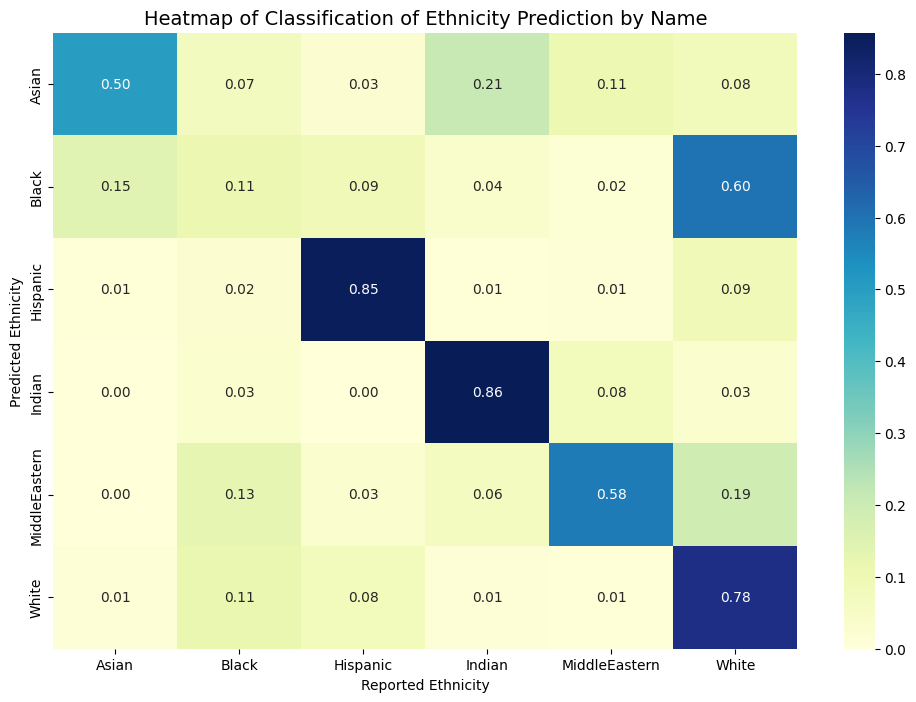

In [242]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(df_temp['ethnicity_recode'], df_temp['predictions_recode'], normalize='index')

    # Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Heatmap of Classification of Ethnicity Prediction by Name", fontsize=14)
plt.xlabel("Reported Ethnicity")
plt.ylabel("Predicted Ethnicity")
plt.show()

In [243]:
df_ceo_merged

,dirid,first,last,fullname,female,ethnicity,ethnicity_recode,names,predictions,confidences,predictions_recode,predictions_recode_strict
0,1.0,james,preston,JAMES E PRESTON,0.0,C,White,JAMES E PRESTON,Celtic,92.858,White,White
1,2.0,charles,miller,CHARLES D MILLER,NaN,UNKNOWN,Unknown,CHARLES D MILLER,Celtic,62.297,White,Unknown
2,3.0,philip,neal,PHILIP M NEAL,0.0,C,White,PHILIP M NEAL,Celtic,91.714,White,White
3,4.0,peter,mullin,PETER W MULLIN,NaN,U,Unknown,PETER W MULLIN,Celtic,81.520,White,White
4,5.0,richard,ferry,RICHARD M FERRY,NaN,CAUCASIAN,White,RICHARD M FERRY,Celtic,76.842,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...
36788,274771.0,kristen,ohara,KRISTEN O'HARA,NaN,CAUCASIAN,White,KRISTEN O'HARA,African,76.683,Black,Black
36789,274775.0,kenneth,slutsky,KENNETH SLUTSKY,NaN,CAUCASIAN,White,KENNETH SLUTSKY,Nordic,83.006,White,White
36790,276441.0,linda,yaccarino,LINDA YACCARINO,NaN,CAUCASIAN,White,LINDA YACCARINO,Celtic,65.279,White,Unknown
36791,277023.0,gerald,chizever,GERALD CHIZEVER,NaN,CAUCASIAN,White,GERALD CHIZEVER,African,88.068,Black,Black


In [244]:
# Save it as CSV

df_ceo_merged.to_csv("ceo_ethnicity_original_n_predictedd.csv", index=False)